In [36]:
##Importing the necessary modules
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


Generating Metadata

In [26]:
##Function to create the metadata

def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

LOADING TRANSCRIPTS

In [27]:

transcription=tran_loader("../data/train/trsTrain.txt")
transcription

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [28]:
# ## Fetching Metadata about the transcript for easy wrangling with pandas

# def meta_data(trans):
#   target=[]
#   features=[]
#   filenames=[]
#   duration_of_recordings=[]

#   path = f'../data/train/wav/'
#   for k in trans:
#     if f'{k}.wav' in path:
#       filename=path+k +".wav"
#       filenames.append(filename)
#       audio, fs = librosa.load(filename, sr=None)
#       duration_of_recordings.append(float(len(audio)/fs))
    
#       lable = trans[k]
#       target.append(lable)

    
#   return filenames, target,duration_of_recordings

loading transcriptions

In [29]:
data = pd.read_csv('../data/transcriptions_amharic.csv')
data.head()

,key,text,duration
0,data/train/wav/tr_1_tr01001.wav,ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል,4.608
1,data/train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384
2,data/train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592
3,data/train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736
4,data/train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192


In [30]:
#Enhance transcription data
data["Text_length"] = [len(i) for i in data.text]

In [31]:
data.head()

,key,text,duration,Text_length
0,data/train/wav/tr_1_tr01001.wav,ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል,4.608,33
1,data/train/wav/tr_2_tr01002.wav,የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...,16.384,129
2,data/train/wav/tr_3_tr01003.wav,በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...,14.592,103
3,data/train/wav/tr_4_tr01004.wav,ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው,4.736,27
4,data/train/wav/tr_5_tr01005.wav,ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...,8.192,50


Word Count

In [32]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()

,word,counts
11509,የ,7638
7568,ን,6295
4772,በ,6278
7526,ና,3140
2628,ም,2792


### DATA EXPLORATION

In [33]:
data.describe()

,duration,Text_length
count,10875.000000,10875.000000
mean,6.631226,56.969747
std,3.068425,28.733023
min,1.792000,12.000000
25%,4.352000,34.000000
50%,5.760000,49.000000
75%,8.320000,75.000000
max,24.192000,165.000000


Word Count in the data

In [34]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()


,word,counts
11509,የ,7638
7568,ን,6295
4772,በ,6278
7526,ና,3140
2628,ም,2792


#### AUDIO PREPROCESSING

In [ ]:
#Taking a sample of the data

train_audio_path = '../data/train/wav/'
samples, sample_rate = librosa.load(train_audio_path+'tr_10_tr01010.wav')
print(samples)
print(sample_rate)

[-0.00562254 -0.00654164 -0.00564277 ... -0.00509709 -0.00456561
  0.        ]
22050


Returns default time-series as numpy array and with the default sample rate of 22KHZ

In [ ]:
audio, rate=librosa.load(train_audio_path+'tr_10_tr01010.wav', sr=44100)
ipd.Audio(samples, rate=sample_rate)

Visualizing the Audio

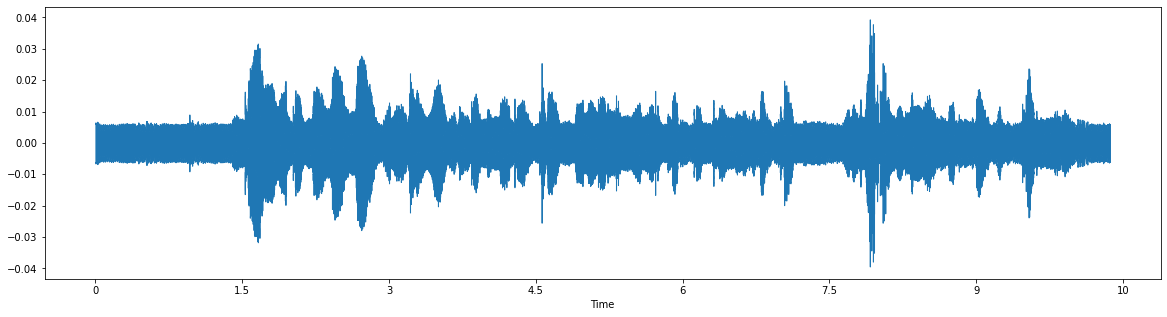

In [ ]:
%matplotlib inline
import librosa.display
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(samples, sr=sample_rate)

In [39]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

Convert time dormain into frequency dormain

In [40]:
spectrum_samples,frequency=spectrogram(samples)

In [41]:
## Numpy array of the amplitude arrays of the voice signal
spectrum_samples

array([[2.89383720e-03, 2.14071519e-03, 3.17145727e-03, ...,
        2.05439133e-03, 2.95659862e-03, 2.86615153e-03],
       [1.53386470e-03, 9.37638963e-04, 1.76775941e-03, ...,
        9.18497279e-04, 1.60507209e-03, 1.44554733e-03],
       [1.10204988e-06, 4.56682306e-06, 6.10660443e-06, ...,
        3.15768078e-06, 2.12393393e-06, 6.35473688e-08],
       ...,
       [1.07841279e-16, 6.57729368e-18, 2.58833005e-18, ...,
        3.57599516e-18, 3.45021066e-19, 1.65922272e-17],
       [8.56039996e-17, 7.23422242e-19, 2.51238446e-19, ...,
        1.16501707e-18, 5.65525251e-18, 6.41642546e-18],
       [4.24548993e-17, 5.45474770e-20, 2.63398854e-18, ...,
        3.64873373e-19, 7.06840317e-18, 5.81702640e-18]])

In [45]:
#Frequency of the signals at various frequency bands

frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

Plotting Spectograms

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

Plot spectogram features

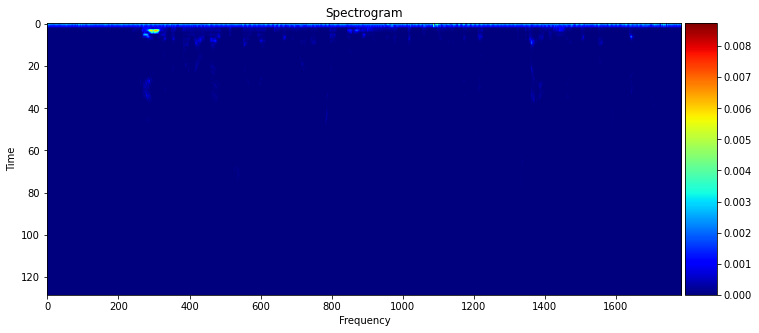

In [47]:
plot_spectrogram_feature(spectrum_samples)

STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows as shown below

Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal

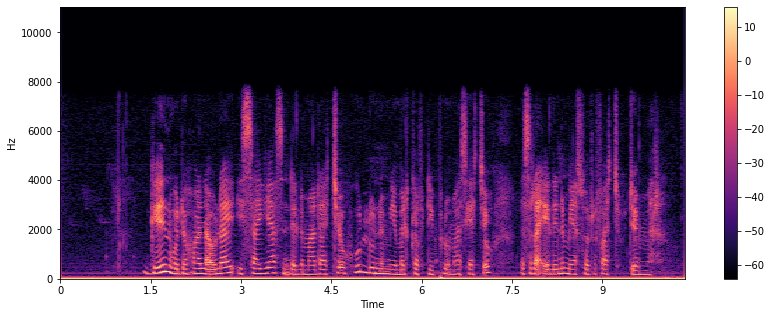

In [48]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

Converting the frequency axis to a logarithmic one to get more details

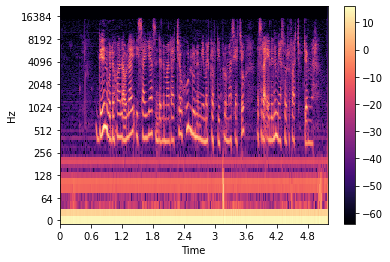

In [50]:
librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

Plotting Spectogram along with amplitude graph for visual comparison

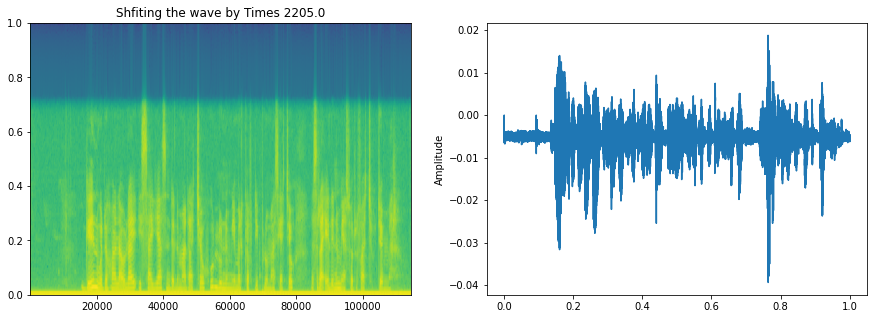

In [52]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/100))
plot_spec(data=wav_roll,sr=sample_rate)
